In [1]:
from readin import *

ms3data = readin_log("proteinGroups_Slavov_simplified.txt")

<Figure size 1000x700 with 1 Axes>

<Figure size 1000x700 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 1000x700 with 1 Axes>

C:\Users\M McCown\Jupyter\readin.py:105: RuntimeWarning: divide by zero encountered in log
  dfl = (np.log(df)).replace(-np.inf, 0)


# Technical Variances

The sets defined at the top are most similar, as calculated in the Finding Technical Replicates section.

Currently ignoring the uncorrected measurments.

In [2]:
"""technical_replicates = {
    "Cell Line 1":[0,1,2],
    "Cell Line 2":[3,4,5],
    "Cell Line 3":[6,8],
    
    "Cell Line 4":[10,11,12],
    "Cell Line 5":[13,14,15],
    "Cell Line 6":[16,18]
} #""" #MS3

technical_replicates = {
    "Cell line 1 Slavov":[0,1,4],
    "Cell line 2 Slavov":[2,3,7],
    "Cell line measurements 9&10":[8,9]
} #""" #As best I can figure for Slavov

technical_variances = []
for sample in technical_replicates:
    #
    reps = {}
    for rep in technical_replicates[sample]:
        reps[ms3data.iloc[:,rep].name] = ms3data.iloc[:,rep]
        
    for r in range(0, len(list(reps.values())[0])):
        rep_for_protein = []
        for rep in reps.values():
            if rep[r] > 0: rep_for_protein.append(rep[r])
            
        if len(rep_for_protein) > 1: 
            v = variance(rep_for_protein)
            technical_variances.append(v)
        else: 
            technical_variances.append(0)

In [3]:
technical_variances = sorted(technical_variances, reverse=True)
print ("Technical Variances Calculated:",len(technical_variances))
print ("Greatest Technical Variance:", technical_variances[0])

print()
threshold = get_thresholds(technical_variances)

Technical Variances Calculated: 2499
Greatest Technical Variance: 5.1438238331228945

Including Zeros: 
95% threshold:  0.5813092689865784
99% threshold:  1.1368933407514967

Ignoring Zeros: 
95% threshold:  0.6160302769785402
99% threshold:  1.161512586049044


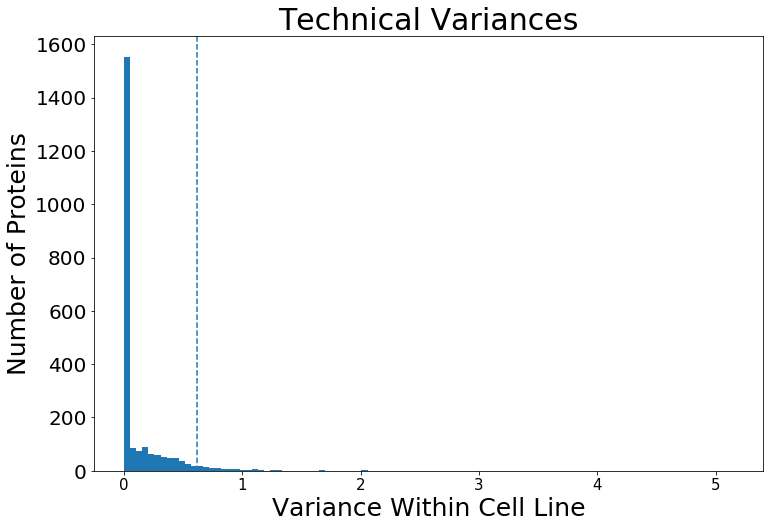

Note that 226 zeros are not shown, out of a dataset of 2499.


In [8]:
fig = plt.figure(figsize=(12,8))

plt.hist(skipZero(technical_variances), bins = 100)
#sns.rugplot(technical_variances, color="gray")
plt.title("Technical Variances")

plt.rc('axes', titlesize=30)
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=20) 

plt.axvline(x= threshold, linestyle='dashed')

plt.xlabel("Variance Within Cell Line")
plt.ylabel("Number of Proteins")

fig.savefig("figures/Technical Variances Slavov10.png", dpi=300)

plt.show()

print ("Note that %i zeros are not shown, out of a dataset of %i." % 
       (len([z for z in technical_variances if (z==0)]), len(technical_variances)))

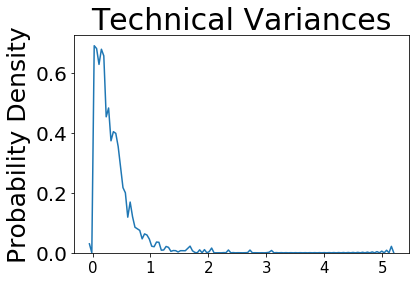

In [5]:
tv_plt = sns.kdeplot(data=technical_variances)
plt.title("Technical Variances")
tv_plt.set(xlabel="", ylabel ="Probability Density")
plt.show()

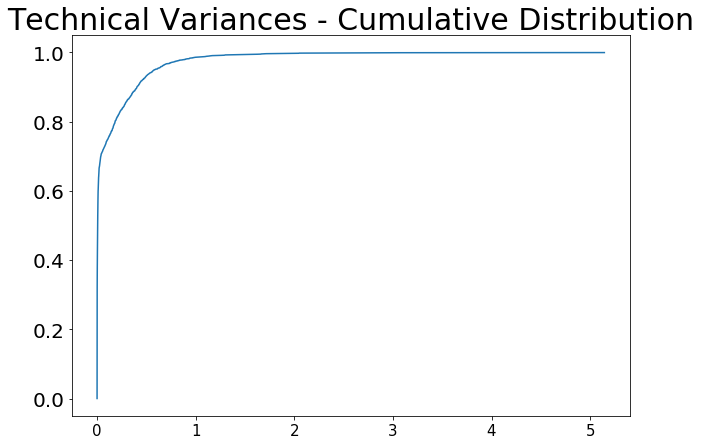

In [6]:
technical_variances = sorted(technical_variances, reverse = True)

x= np.sort(technical_variances)
plt.figure(figsize=(10,7))
plt.plot(x, np.arange(len(x))/float(len(x)))
plt.title("Technical Variances - Cumulative Distribution")
plt.show()

Including Zeros: 
95% threshold:  0.5813092689865784
99% threshold:  1.1368933407514967

Ignoring Zeros: 
95% threshold:  0.6160302769785402
99% threshold:  1.161512586049044


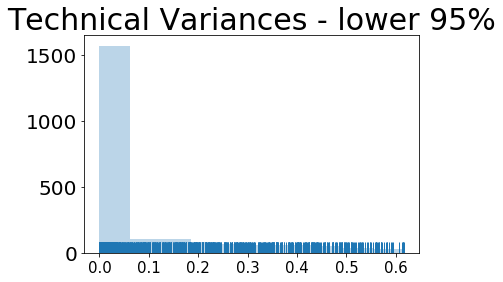

Note that zeros are not shown


In [7]:
#calculate 95% threshold
get_thresholds(technical_variances)

non_zero_tech_var = skipZero(technical_variances)
threshold_index = math.ceil(float(len(non_zero_tech_var))*0.05)

x= np.sort(non_zero_tech_var[threshold_index:])
plt.hist(x, alpha=.3)
sns.rugplot(x)
plt.title("Technical Variances - lower 95%")
plt.show()

print ("Note that zeros are not shown")